In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Create a DataFrame
#df = pd.DataFrame(data)
#url='https://github.com/x-y-zhao/LPQ_survey_study/blob/main/V2_encoded_data.csv?raw=true'

df = pd.read_csv('V2_encoded_data.csv')

print(df)

     q1   q2   q3   q4  q5  q6  q7  q8  q9  q10  q11  q12
0   0.5  0.0  0.0  0.5   0   1   1   1   1    0    0    0
1   0.0  0.0  0.0  0.5   1   1   1   1   1    1    1    0
2   0.5  1.0  1.0  1.0   0   1   1   1   1    1    1    1
3   1.0  1.0  1.0  1.0   0   1   1   1   1    1    1    1
4   0.5  0.5  0.5  0.5   1   1   1   0   0    1    1    1
5   0.0  1.0  0.0  0.5   1   1   1   0   0    0    1    1
6   0.0  0.5  0.0  0.5   0   1   1   1   0    1    1    0
7   0.5  1.0  0.0  0.5   0   1   0   1   1    1    1    0
8   0.5  0.5  0.5  0.5   0   1   1   1  -1    1    1    0
9  -0.5 -0.5  0.0  0.5   0   0   1   1   1    1    1    1
10  0.0  0.5  1.0  0.5   1   1   0   1   0    1    1    1
11  0.0  0.5  0.5  0.0   0   1   1   1   1    1    1    0
12  0.5  0.5  0.0  1.0   1   1   1   1   0    1    1    1
13  0.5  0.5  0.5  0.5   0   1   1   1   1    1    1    1
14  0.5  0.5  0.5  1.0   1   1   1   0   0    1    1    1
15  0.5  0.5  0.5  0.5   0   1   1   1   1    1    1    1
16  0.0  0.5  

In [3]:
# Calculate the correlation matrix
correlation_matrix = df.corr() # method='spearman'; method='kendall'
print(correlation_matrix)

           q1        q2        q3        q4        q5        q6        q7  \
q1   1.000000  0.526202  0.504407  0.527138 -0.054777  0.320965  0.041082   
q2   0.526202  1.000000  0.527589  0.395992  0.138171  0.422410  0.041451   
q3   0.504407  0.527589  1.000000  0.357222 -0.071425  0.189242 -0.021427   
q4   0.527138  0.395992  0.357222  1.000000  0.228943  0.106047  0.156098   
q5  -0.054777  0.138171 -0.071425  0.228943  1.000000 -0.113228  0.027778   
q6   0.320965  0.422410  0.189242  0.106047 -0.113228  1.000000  0.283069   
q7   0.041082  0.041451 -0.021427  0.156098  0.027778  0.283069  1.000000   
q8   0.014076  0.047341  0.112571 -0.021393 -0.279175  0.232767  0.342624   
q9   0.093604 -0.019540  0.057239 -0.004906 -0.226973  0.053376  0.261891   
q10  0.041082 -0.103628  0.128565  0.156098 -0.166667  0.283069  0.125000   
q11 -0.069775  0.225285  0.189242  0.106047 -0.113228  0.461538  0.283069   
q12 -0.072056  0.158624  0.348490  0.388276  0.106299  0.072216  0.106299   

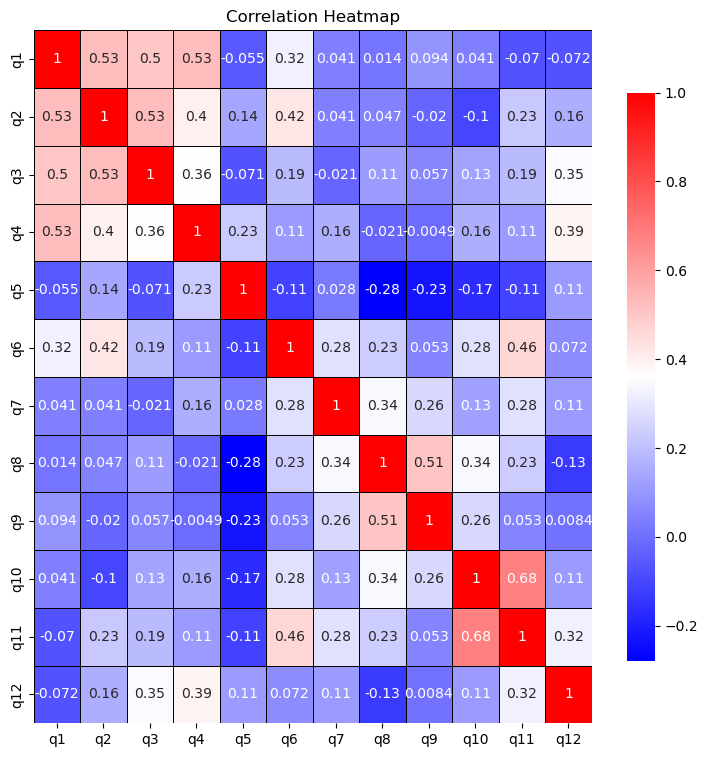

In [4]:

# Visualize the correlation matrix as a heatmap
#plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
#plt.title("Correlation Heatmap")
#plt.show()

# Plot heatmap
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, 
            cmap='bwr',
            annot=True, 
            linewidths=0.5,
            linecolor="black",
            cbar_kws={"shrink": .82})

plt.title('Correlation Heatmap')
plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

# Calculate the mean response for each question within each cluster
cluster_means = df.groupby('cluster')[['q1', 'q2', 'q3', 'q4', 'q5','q6','q7', 'q8', 'q9', 'q10', 'q11','q12']].mean()

# Print cluster means
print(cluster_means)

# Print the survey data with cluster assignments
print(df)

               q1        q2        q3        q4        q5        q6        q7  \
cluster                                                                         
0        0.566667  0.700000  0.633333  0.633333  0.133333  1.000000  0.933333   
1        0.181818  0.363636  0.318182  0.545455  0.454545  0.909091  0.818182   
2        0.500000  0.250000  0.250000  0.500000  0.500000  0.500000  0.500000   

               q8        q9       q10  q11       q12  
cluster                                               
0        1.000000  0.933333  0.933333  1.0  0.733333  
1        0.636364  0.181818  0.909091  1.0  0.636364  
2        0.500000  0.500000  0.000000  0.0  0.000000  
     q1   q2   q3   q4  q5  q6  q7  q8  q9  q10  q11  q12  cluster
0   0.5  0.0  0.0  0.5   0   1   1   1   1    0    0    0        2
1   0.0  0.0  0.0  0.5   1   1   1   1   1    1    1    0        1
2   0.5  1.0  1.0  1.0   0   1   1   1   1    1    1    1        0
3   1.0  1.0  1.0  1.0   0   1   1   1   1    1    

C:\Users\Zhao2_x\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Zhao2_x\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


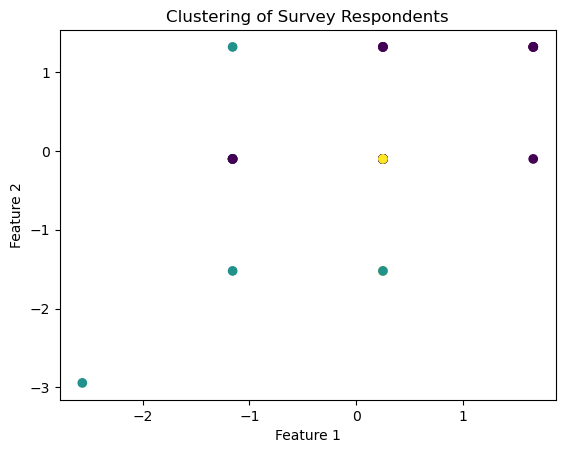

In [6]:
# Visualize the clusters (assuming only 2D data for visualization)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering of Survey Respondents')
plt.show()



In [7]:
from sklearn.decomposition import FactorAnalysis

df.drop(df.columns[-1], axis=1, inplace=True)


# Perform Factor Analysis
n_factors = 5  # Specify the number of factors you want to extract
fa = FactorAnalysis(n_components=n_factors, random_state=0)
factor_scores = fa.fit_transform(df)


# Get factor loadings (relationship between observed variables and factors)
factor_loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor_{i+1}' for i in range(n_factors)])
print("Factor Loadings:")
print(factor_loadings)

# Calculate explained variance ratio
eigenvalues = fa.get_covariance().diagonal()
explained_variance_ratio = eigenvalues / sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

# Add factor scores to the original DataFrame
factor_columns = [f'Factor_{i+1}' for i in range(n_factors)]
data_with_factors = pd.concat([df, pd.DataFrame(factor_scores, columns=factor_columns)], axis=1)
print("Data with Factor Scores:")
print(data_with_factors)


Factor Loadings:
    Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
0  -0.009060 -0.330233 -0.047884 -0.014664  0.027912
1  -0.058894 -0.225614  0.105464  0.133452 -0.022561
2  -0.084061 -0.194345  0.073701 -0.022817 -0.058949
3  -0.045919 -0.134883  0.055933 -0.072746 -0.016799
4   0.078199 -0.006311  0.145063 -0.032565  0.070190
5  -0.118889 -0.084401 -0.001025  0.085563 -0.003148
6  -0.096856 -0.014990 -0.005122  0.061135 -0.110816
7  -0.132489 -0.003763 -0.179794  0.070272 -0.235492
8  -0.104684 -0.038445 -0.191733 -0.060419 -0.281834
9  -0.293953  0.015275 -0.115149 -0.102001  0.029812
10 -0.238548  0.019563  0.040616  0.050544  0.019094
11 -0.177686 -0.015733  0.397435 -0.189676 -0.150117
Explained Variance Ratio: [0.06880959 0.0674706  0.06320423 0.02974435 0.1503549  0.03619149
 0.06686293 0.08028017 0.16900824 0.06692746 0.0362341  0.16491195]
Data with Factor Scores:
     q1   q2   q3   q4  q5  q6  q7  q8  q9  q10  q11  q12  Factor_1  Factor_2  \
0   0.5  0.0  0.0  0.5   0 